<a href="https://colab.research.google.com/github/rodrigorhoads/TechChallengeFase1/blob/main/TechChalange_Modelo_Previsao_Custos_Individual_com_Plano_de_Saude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
pd.set_option('display.max_columns', None)
base_original = pd.read_csv('insurance_synthetic_200k.csv')
base_original.head()

,age,bmi,children,sex,smoker,region,charges,heart_disease,had_surgery,family_diabetes,family_cancer
0,52,28,3,female,no,northwest,7740.061495,no,no,no,no
1,15,21,1,female,no,northwest,0.000000,no,no,no,no
2,72,39,0,female,no,southwest,14543.915999,no,no,no,no
3,61,11,0,female,no,southeast,5639.723874,no,yes,no,no
4,21,26,0,female,no,northwest,0.000000,no,no,no,no


In [ ]:
base_original.shape

(200000, 11)

In [ ]:
base_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   age              200000 non-null  int64  
 1   bmi              200000 non-null  int64  
 2   children         200000 non-null  int64  
 3   sex              200000 non-null  object 
 4   smoker           200000 non-null  object 
 5   region           200000 non-null  object 
 6   charges          200000 non-null  float64
 7   heart_disease    200000 non-null  object 
 8   had_surgery      200000 non-null  object 
 9   family_diabetes  200000 non-null  object 
 10  family_cancer    200000 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 16.8+ MB


In [ ]:
base_original.isnull().sum()

,0
age,0
bmi,0
children,0
sex,0
smoker,0
region,0
charges,0
heart_disease,0
had_surgery,0
family_diabetes,0


In [ ]:
base_original.duplicated().sum()

np.int64(4002)

In [ ]:
base_original[base_original.duplicated()]

,age,bmi,children,sex,smoker,region,charges,heart_disease,had_surgery,family_diabetes,family_cancer
1086,9,35,0,male,no,northwest,0.0,no,no,no,no
1326,5,33,0,male,no,northeast,0.0,no,no,no,yes
3580,33,29,0,male,no,northeast,0.0,no,no,no,no
3813,17,32,0,male,no,southeast,0.0,no,no,no,no
5183,15,34,1,male,no,southeast,0.0,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...
199778,1,19,0,male,no,southeast,0.0,no,yes,no,no
199831,10,31,0,male,no,southeast,0.0,no,no,no,no
199845,6,33,2,male,no,southeast,0.0,no,no,no,no
199951,19,29,0,male,no,northwest,0.0,no,no,no,no


In [ ]:
base_original.drop_duplicates(inplace=True)

In [ ]:
base_original.duplicated().sum()

np.int64(0)

In [ ]:
base_original.describe()

,age,bmi,children,charges
count,195998.000000,195998.000000,195998.000000,195998.000000
mean,38.418749,30.628833,1.107787,13828.175323
std,21.498159,7.981283,1.210703,12030.718437
min,1.000000,1.000000,0.000000,0.000000
25%,20.000000,26.000000,0.000000,4111.073029
50%,39.000000,30.000000,1.000000,11187.900683
75%,57.000000,34.000000,2.000000,20527.713459
max,75.000000,60.000000,5.000000,72987.524943


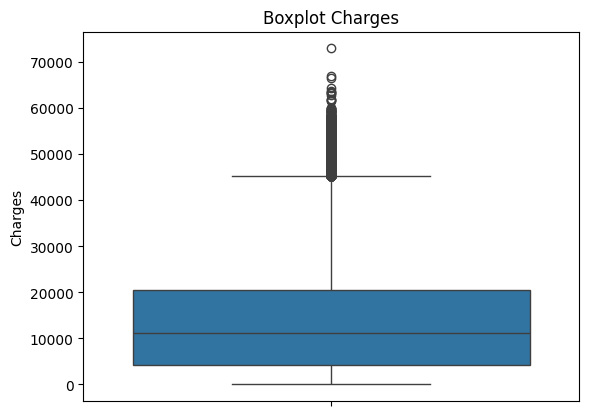

In [ ]:
sb.boxplot(data=base_original, y='charges')
plt.title('Boxplot Charges')
plt.ylabel('Charges')
plt.show()

Nossa variável target tem muitos outliers acima dos 45 mil.

In [ ]:
target = base_original['charges']
q1 = target.quantile(0.25)
q3 = target.quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

In [ ]:
print(f'1º Quartil: {q1}')
print(f'3º Quartil: {q3}')
print(f'Limite Inferior: {limite_inferior}')
print(f'Limite Superior: {limite_superior}')

1º Quartil: 4111.073029111341
3º Quartil: 20527.713459277413
Limite Inferior: -20513.88761613777
Limite Superior: 45152.67410452652


Utilizando a técnica do IQR (Intervalor interquartil ) estamos encontrando os limites dos dados onde não possua presença de outliers.

In [ ]:
base_original.age.value_counts()
base_original.age.duplicated().sum()
base_original.age.describe()

,age
count,195998.000000
mean,38.418749
std,21.498159
min,1.000000
25%,20.000000
50%,39.000000
75%,57.000000
max,75.000000


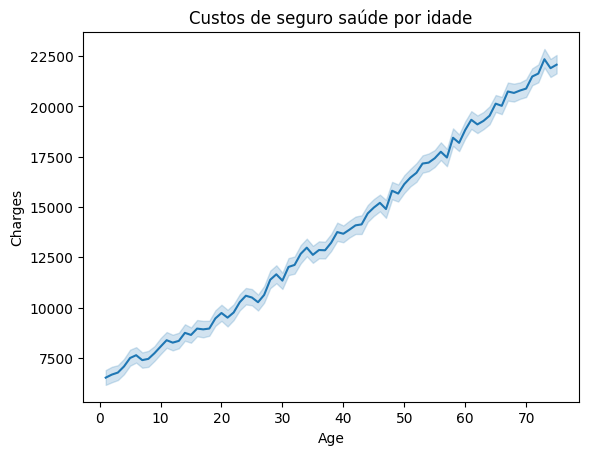

In [ ]:
sb.lineplot(x=base_original['age'], y=base_original['charges'])
plt.title('Custos de seguro saúde por idade')
plt.ylabel('Charges')
plt.xlabel('Age')
plt.show()

Os custos de saúde aumentam conforme a idade aumenta?
Sim no gráfico acima fica bem claro que os custos aumentam de forma linear a idade.

In [ ]:
base_original.bmi.describe()

,bmi
count,195998.000000
mean,30.628833
std,7.981283
min,1.000000
25%,26.000000
50%,30.000000
75%,34.000000
max,60.000000


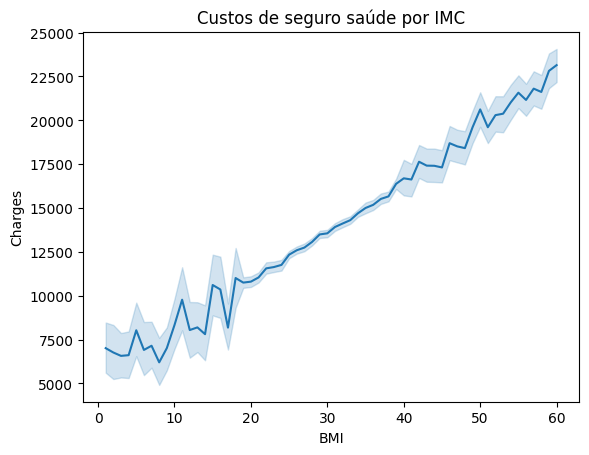

In [ ]:
sb.lineplot(x=base_original['bmi'], y=base_original['charges'])
plt.title('Custos de seguro saúde por IMC')
plt.ylabel('Charges')
plt.xlabel('BMI')
plt.show()

Os custos aumentam conforme IMC aumenta?
Sim podemos ver que sim em geral os custos tendem a aumentar conforme o IMC, um aumento linear.

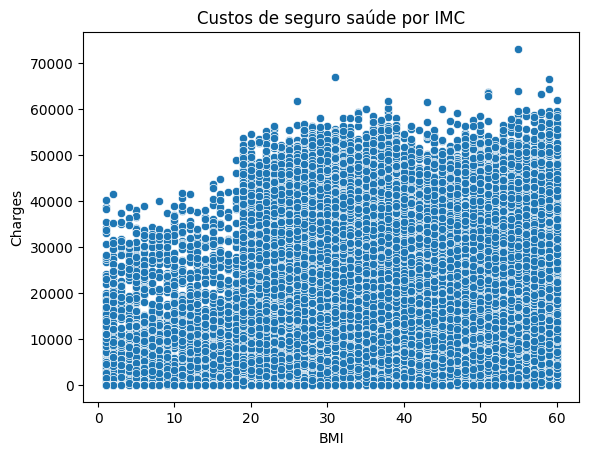

In [ ]:
sb.scatterplot(x=base_original['bmi'], y=base_original['charges'])
plt.title('Custos de seguro saúde por IMC')
plt.ylabel('Charges')
plt.xlabel('BMI')
plt.show()

In [ ]:
base_original.children.describe()

,children
count,195998.000000
mean,1.107787
std,1.210703
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,5.000000


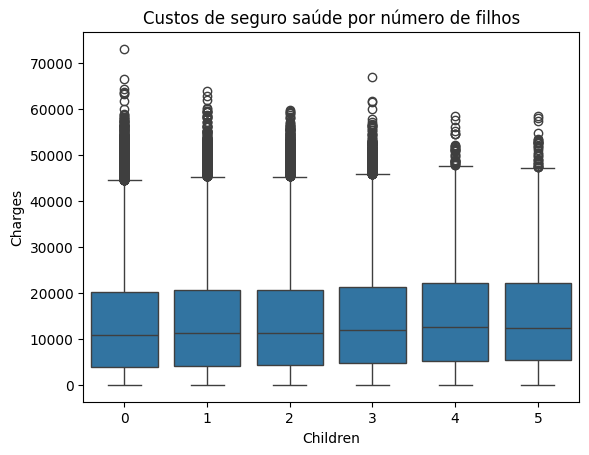

In [ ]:
sb.boxplot(x=base_original['children'], y=base_original['charges'])
plt.title('Custos de seguro saúde por número de filhos')
plt.ylabel('Charges')
plt.xlabel('Children')
plt.show()

Avaliando o gráfico acima podemos notar que os preços são praticamente iguais para os números de filhos, demonstrando que ter mais ou menos filhos não tem um impacto no aumento dos custos do plano de saúde.

In [ ]:
base_original.sex.describe()

,sex
count,195998
unique,2
top,male
freq,98706


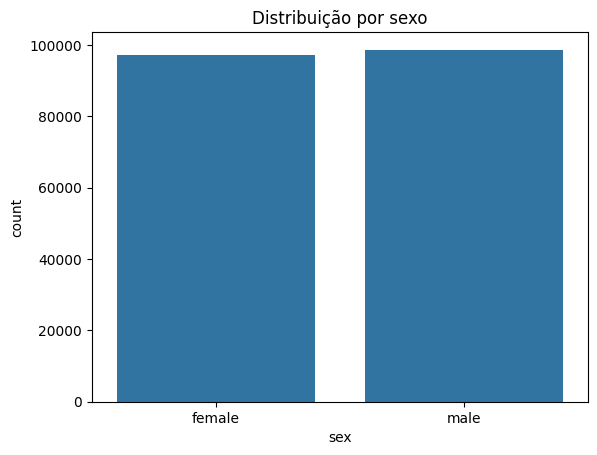

In [ ]:
sb.countplot(x=base_original['sex'])
plt.title('Distribuição por sexo')
plt.show()

A nossa base possui um proporção quase identica de pessoas do sexo masculino e feminino.

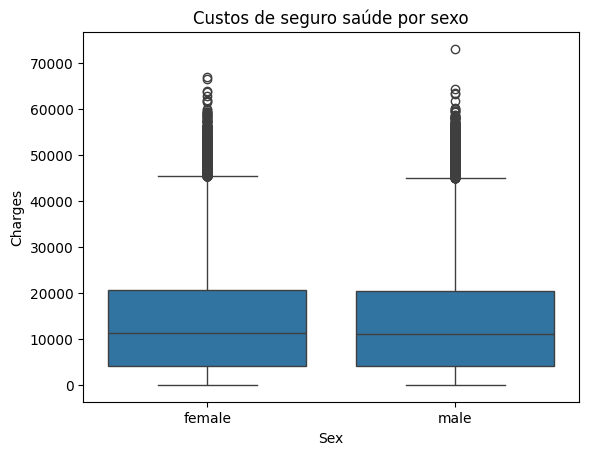

In [ ]:
sb.boxplot(x=base_original['sex'], y=base_original['charges'])
plt.title('Custos de seguro saúde por sexo')
plt.ylabel('Charges')
plt.xlabel('Sex')
plt.show()

Os custos não aumentam baseado no sexo, conforme gráfico tanto pessoas do sexo feminino como masculino tem faixa de preços praticamente iguais.

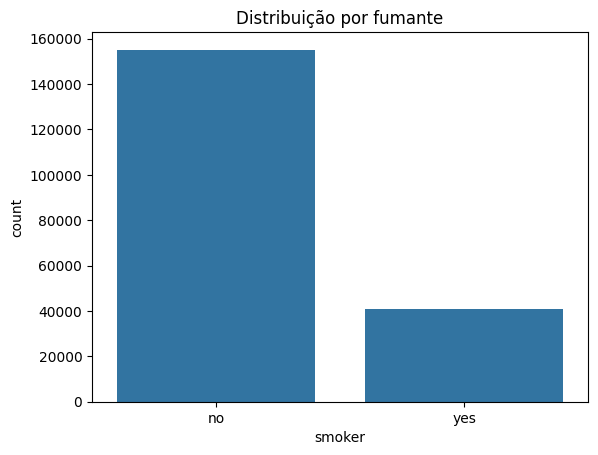

In [ ]:
sb.countplot(x=base_original['smoker'])
plt.title('Distribuição por fumante')
plt.show()

Como podemos ver existem um número praticamente 3 vezes maior de não fumantes.

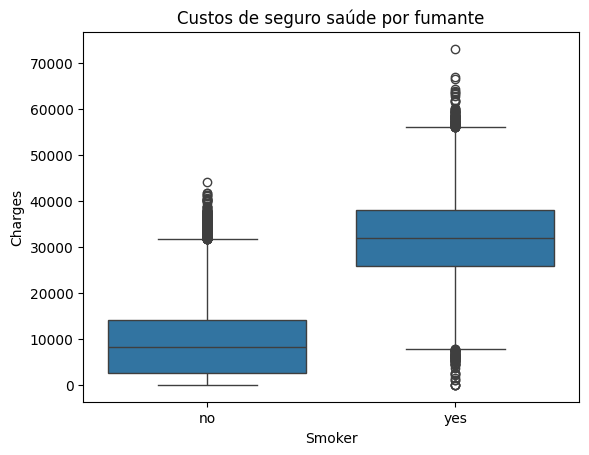

In [ ]:
sb.boxplot(x=base_original['smoker'], y=base_original['charges'])
plt.title('Custos de seguro saúde por fumante')
plt.ylabel('Charges')
plt.xlabel('Smoker')
plt.show()

Observando o gráfico dos custos de saúde agrupado por fumantes e não fumantes podemos perceber claramente que fumar tem um impacto gigantesco nos custos com plano de sáude, apesar de termos 3 vezes mais pessoas que não fumam os custos de quem fuma chega a ser 3 vezes maior do que quem não fuma.

In [ ]:
base_original.region.describe()

,region
count,195998
unique,4
top,southeast
freq,53312


In [ ]:
base_original.region.value_counts()

,count
region,
southeast,53312
southwest,47634
northwest,47571
northeast,47481


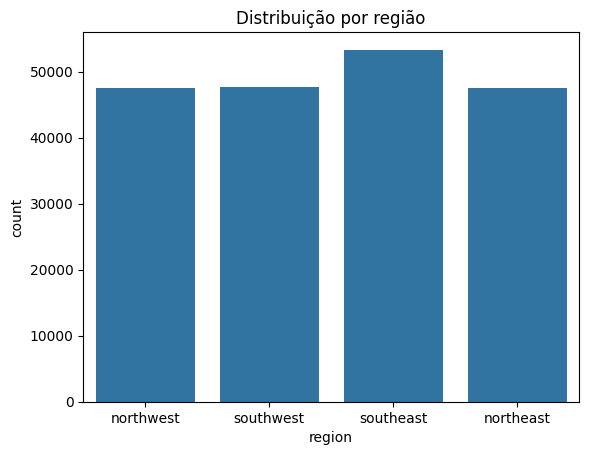

In [ ]:
sb.countplot(x=base_original['region'])
plt.title('Distribuição por região')
plt.show()

a distribuição de pessoas pelas regiões é equilibrada com um pequena concentração na região sudeste.

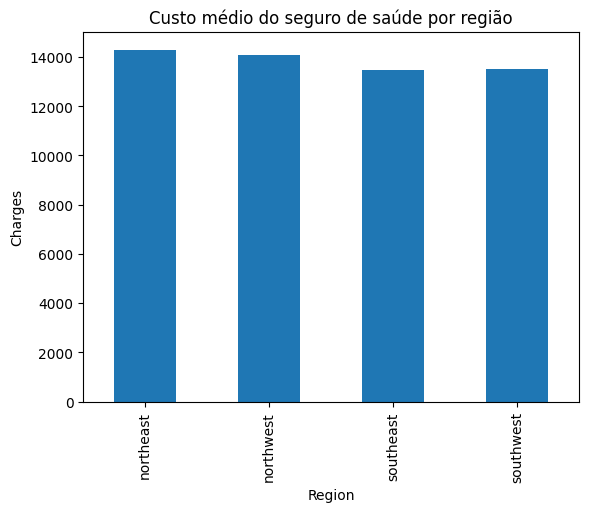

In [ ]:
base_original.groupby('region')['charges'].mean().plot(kind='bar')
plt.title('Custo médio do seguro de saúde por região')
plt.ylabel('Charges')
plt.xlabel('Region')
plt.show()

Os custos por região também não demonstram disparidade entre uma região e outra, com um leve aumento na região nordeste porém todos estão na mesma faixa.

In [ ]:
base_original.heart_disease.describe()

,heart_disease
count,195998
unique,2
top,no
freq,176184


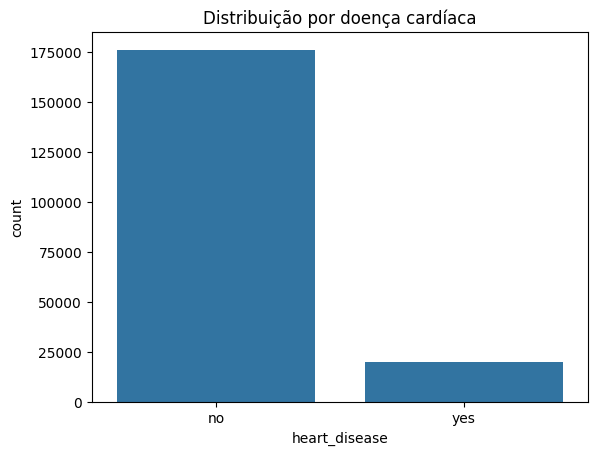

In [ ]:
sb.countplot(x=base_original['heart_disease'])
plt.title('Distribuição por doença cardíaca')
plt.show()

A maioria das pessoas não possui doença cardiáca.

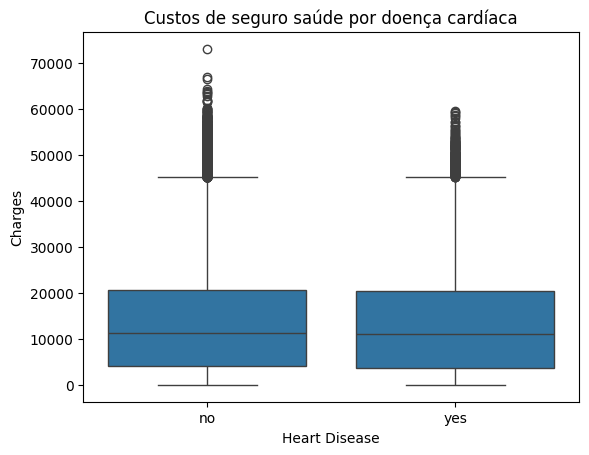

In [ ]:
sb.boxplot(x=base_original['heart_disease'], y=base_original['charges'])
plt.title('Custos de seguro saúde por doença cardíaca')
plt.ylabel('Charges')
plt.xlabel('Heart Disease')
plt.show()

Os custos de quem tem doença cardiáca pré-existente e quem não tem são próximos com uma maior incidencia de outliers para quem não tem doença cardiáca.

In [ ]:
base_original.had_surgery.describe()

,had_surgery
count,195998
unique,2
top,no
freq,136498


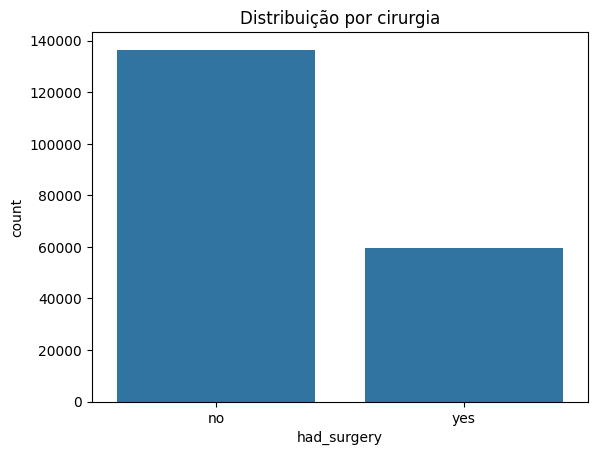

In [ ]:
sb.countplot(x=base_original['had_surgery'])
plt.title('Distribuição por cirurgia')
plt.show()

A maioria das pessoas não realizou cirurgia.

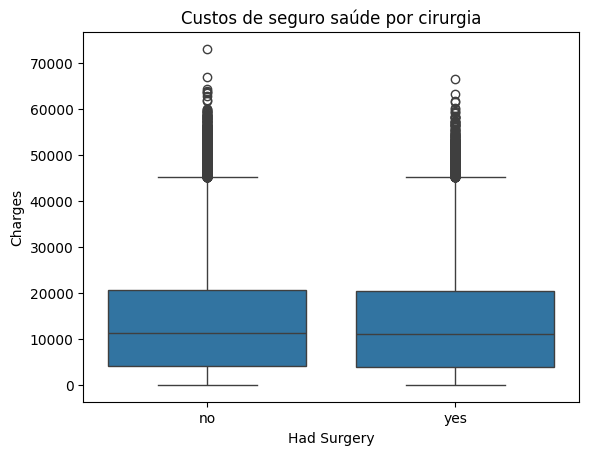

In [ ]:
sb.boxplot(x=base_original['had_surgery'], y=base_original['charges'])
plt.title('Custos de seguro saúde por cirurgia')
plt.ylabel('Charges')
plt.xlabel('Had Surgery')
plt.show()

Os custos de quem realizou cirurgia e quem realizou também são próximos não demonstrando qualquer aumento para quem já realizou cirurgia.

In [ ]:
base_original.family_diabetes.describe()

,family_diabetes
count,195998
unique,2
top,no
freq,156231


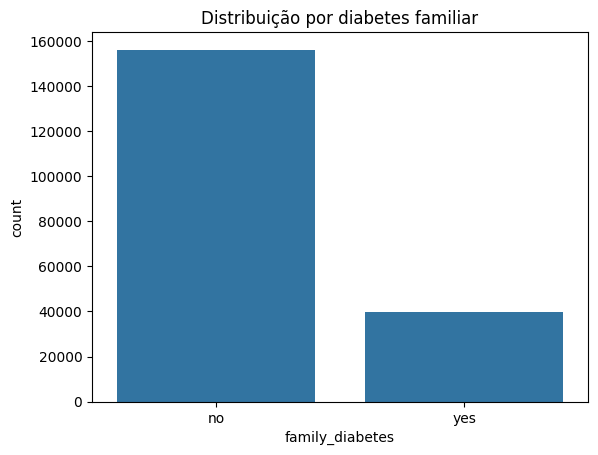

In [ ]:
sb.countplot(x=base_original['family_diabetes'])
plt.title('Distribuição por diabetes familiar')
plt.show()

A maioria das pessoas não tem histórico de diabetes na família.

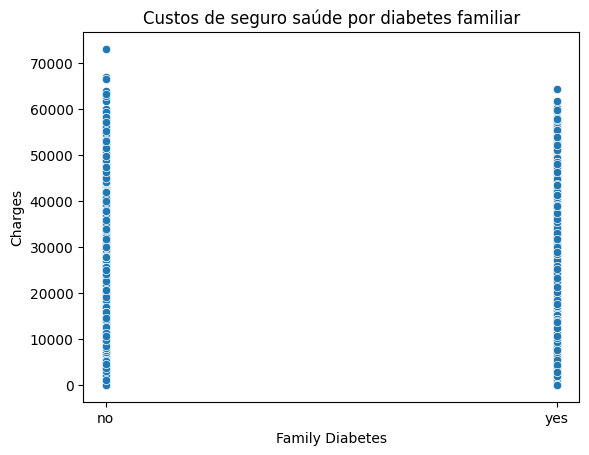

In [ ]:
sb.scatterplot(x=base_original['family_diabetes'], y=base_original['charges'])
plt.title('Custos de seguro saúde por diabetes familiar')
plt.ylabel('Charges')
plt.xlabel('Family Diabetes')
plt.show()

O gráfico também nos mostra que ter histórico de diabetes na família não é um fator que causa aumento nos custos de saúde, a concentração de custos entre ter ou não histórico de diabetes na família é muito similar.

In [ ]:
base_original.family_cancer.describe()

,family_cancer
count,195998
unique,2
top,no
freq,166066


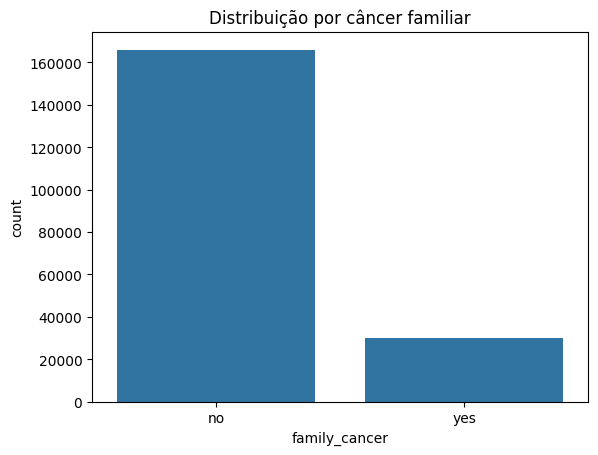

In [ ]:
sb.countplot(x=base_original['family_cancer'])
plt.title('Distribuição por câncer familiar')
plt.show()

A maioria das pessoas não tem histórico de cancer na família.

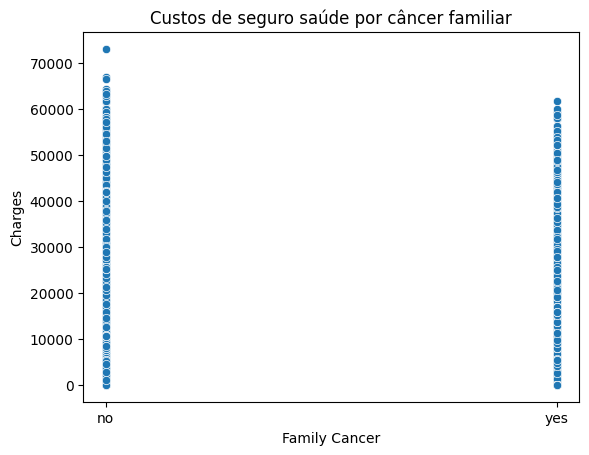

In [ ]:
sb.scatterplot(x=base_original['family_cancer'], y=base_original['charges'])
plt.title('Custos de seguro saúde por câncer familiar')
plt.ylabel('Charges')
plt.xlabel('Family Cancer')
plt.show()

Ter histórico de cancer na família também não demonstrou ser determinante para o aumento nos custos de saúde.

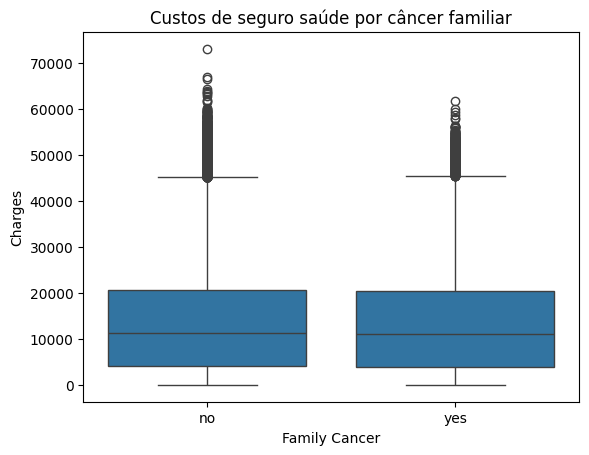

In [ ]:
sb.boxplot(x=base_original['family_cancer'], y=base_original['charges'])
plt.title('Custos de seguro saúde por câncer familiar')
plt.ylabel('Charges')
plt.xlabel('Family Cancer')
plt.show()

chegamos a conclusão que as variáveis que mais influenciam nos preços são ser fumante, idade e IMC.

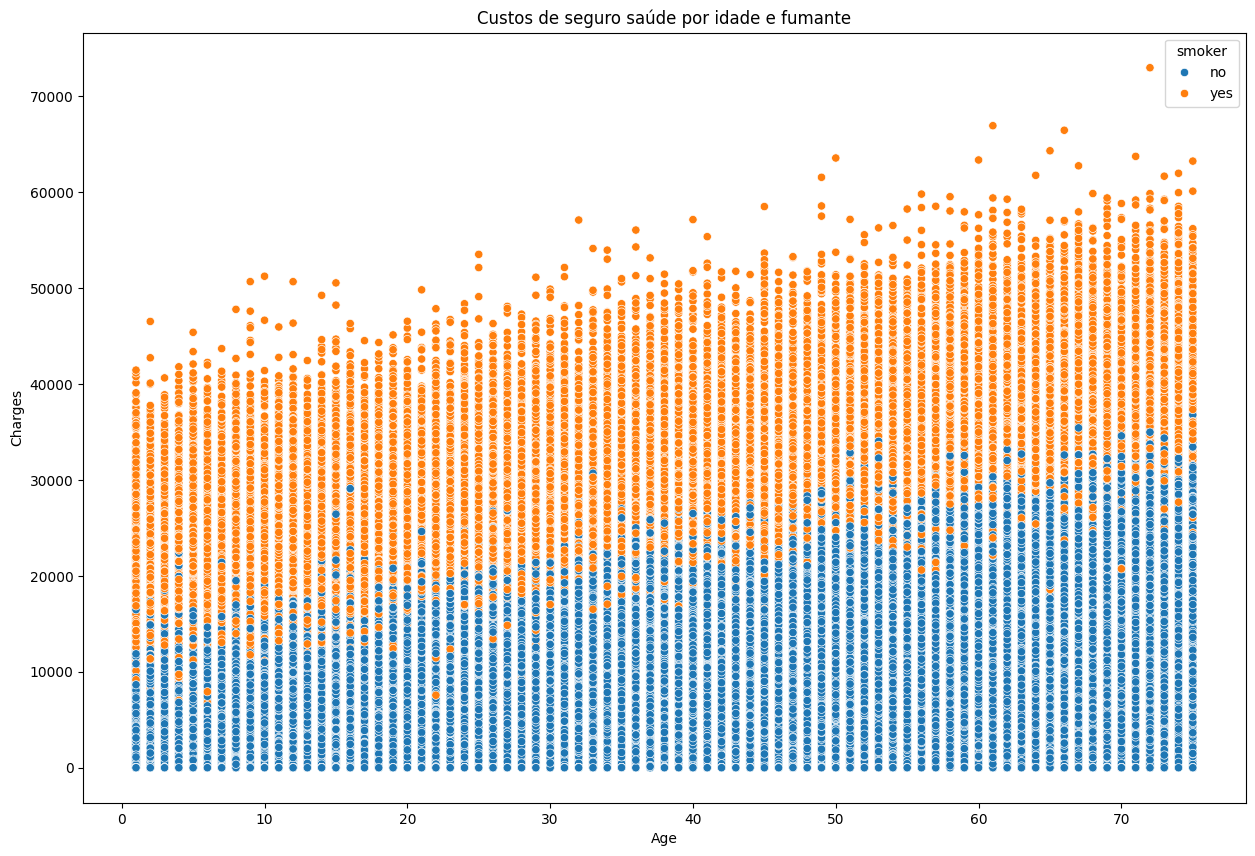

In [ ]:
plt.figure(figsize=(15,10))
sb.scatterplot(data=base_original, x='age', y='charges', hue='smoker')
plt.title('Custos de seguro saúde por idade e fumante')
plt.ylabel('Charges')
plt.xlabel('Age')
plt.show()

Nesse caso fica evidente que ser fumante ter um forte impacto nos custos de saúde e podemos notar que conforme a idade avança também aumentam os custos com seguro saúde linearmente.

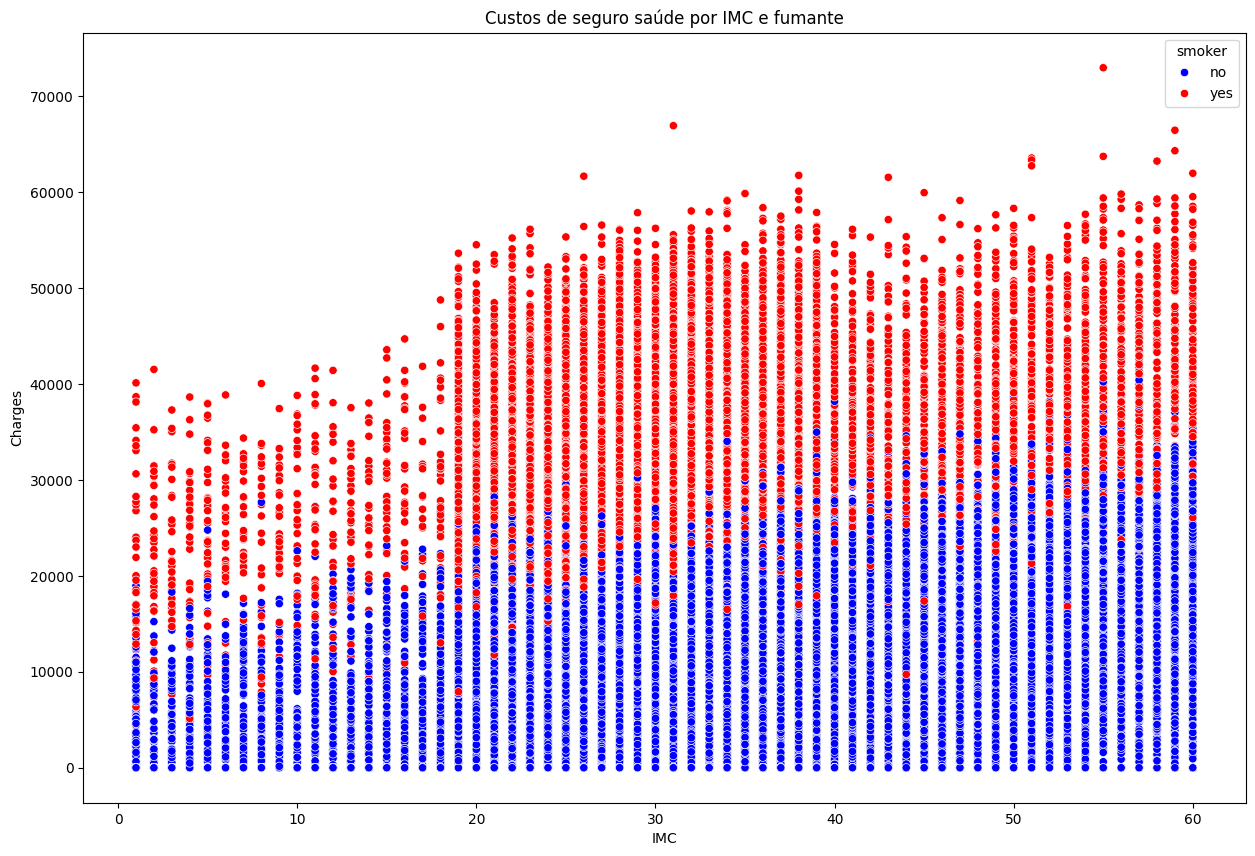

In [ ]:
plt.figure(figsize=(15,10))
sb.scatterplot(data=base_original, x='bmi', y='charges', hue='smoker',palette={'yes':'red', 'no':'blue'})
plt.title('Custos de seguro saúde por IMC e fumante')
plt.ylabel('Charges')
plt.xlabel('IMC')
plt.show()

Esse segundo gráfico cruzando smoker, charges e bmi deixa mais claro ainda como ser fumante é determinando para ter um custo maior no plano de saúde, como podemos ver mesmo pessoas magras com IMC baixo já pagam valores muito mais altos do que quem não fuma.

vamos começar a tratar nossos dados

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
colunas_categoricas = ['sex', 'smoker', 'region','heart_disease','had_surgery','family_diabetes','family_cancer']
dados_categoricos = ohe.fit_transform(base_original[colunas_categoricas])
df_dados_categoricos = pd.DataFrame(dados_categoricos.toarray(), columns=ohe.get_feature_names_out())
df_dados_categoricos.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,heart_disease_no,heart_disease_yes,had_surgery_no,had_surgery_yes,family_diabetes_no,family_diabetes_yes,family_cancer_no,family_cancer_yes
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
df_dados_categoricos.describe()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,heart_disease_no,heart_disease_yes,had_surgery_no,had_surgery_yes,family_diabetes_no,family_diabetes_yes,family_cancer_no,family_cancer_yes
count,195998.000000,195998.000000,195998.000000,195998.000000,195998.000000,195998.000000,195998.000000,195998.000000,195998.000000,195998.000000,195998.000000,195998.000000,195998.000000,195998.000000,195998.000000,195998.000000
mean,0.496393,0.503607,0.791574,0.208426,0.242252,0.242712,0.272003,0.243033,0.898907,0.101093,0.696425,0.303575,0.797105,0.202895,0.847284,0.152716
std,0.499988,0.499988,0.406184,0.406184,0.428447,0.428723,0.444992,0.428916,0.301452,0.301452,0.459802,0.459802,0.402156,0.402156,0.359714,0.359714
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_dados_categoricos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195998 entries, 0 to 195997
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sex_female           195998 non-null  float64
 1   sex_male             195998 non-null  float64
 2   smoker_no            195998 non-null  float64
 3   smoker_yes           195998 non-null  float64
 4   region_northeast     195998 non-null  float64
 5   region_northwest     195998 non-null  float64
 6   region_southeast     195998 non-null  float64
 7   region_southwest     195998 non-null  float64
 8   heart_disease_no     195998 non-null  float64
 9   heart_disease_yes    195998 non-null  float64
 10  had_surgery_no       195998 non-null  float64
 11  had_surgery_yes      195998 non-null  float64
 12  family_diabetes_no   195998 non-null  float64
 13  family_diabetes_yes  195998 non-null  float64
 14  family_cancer_no     195998 non-null  float64
 15  family_cancer_yes

In [ ]:
base_final = pd.concat([base_original.reset_index(drop=True), df_dados_categoricos.reset_index(drop=True)], axis=1)
base_final.head()

,age,bmi,children,sex,smoker,region,charges,heart_disease,had_surgery,family_diabetes,family_cancer,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,heart_disease_no,heart_disease_yes,had_surgery_no,had_surgery_yes,family_diabetes_no,family_diabetes_yes,family_cancer_no,family_cancer_yes
0,52,28,3,female,no,northwest,7740.061495,no,no,no,no,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,15,21,1,female,no,northwest,0.000000,no,no,no,no,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,72,39,0,female,no,southwest,14543.915999,no,no,no,no,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,61,11,0,female,no,southeast,5639.723874,no,yes,no,no,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,21,26,0,female,no,northwest,0.000000,no,no,no,no,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
base_final.drop(columns=colunas_categoricas, inplace=True)
base_final.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,heart_disease_no,heart_disease_yes,had_surgery_no,had_surgery_yes,family_diabetes_no,family_diabetes_yes,family_cancer_no,family_cancer_yes
0,52,28,3,7740.061495,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,15,21,1,0.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,72,39,0,14543.915999,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,61,11,0,5639.723874,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,21,26,0,0.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
base_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195998 entries, 0 to 195997
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  195998 non-null  int64  
 1   bmi                  195998 non-null  int64  
 2   children             195998 non-null  int64  
 3   charges              195998 non-null  float64
 4   sex_female           195998 non-null  float64
 5   sex_male             195998 non-null  float64
 6   smoker_no            195998 non-null  float64
 7   smoker_yes           195998 non-null  float64
 8   region_northeast     195998 non-null  float64
 9   region_northwest     195998 non-null  float64
 10  region_southeast     195998 non-null  float64
 11  region_southwest     195998 non-null  float64
 12  heart_disease_no     195998 non-null  float64
 13  heart_disease_yes    195998 non-null  float64
 14  had_surgery_no       195998 non-null  float64
 15  had_surgery_yes  

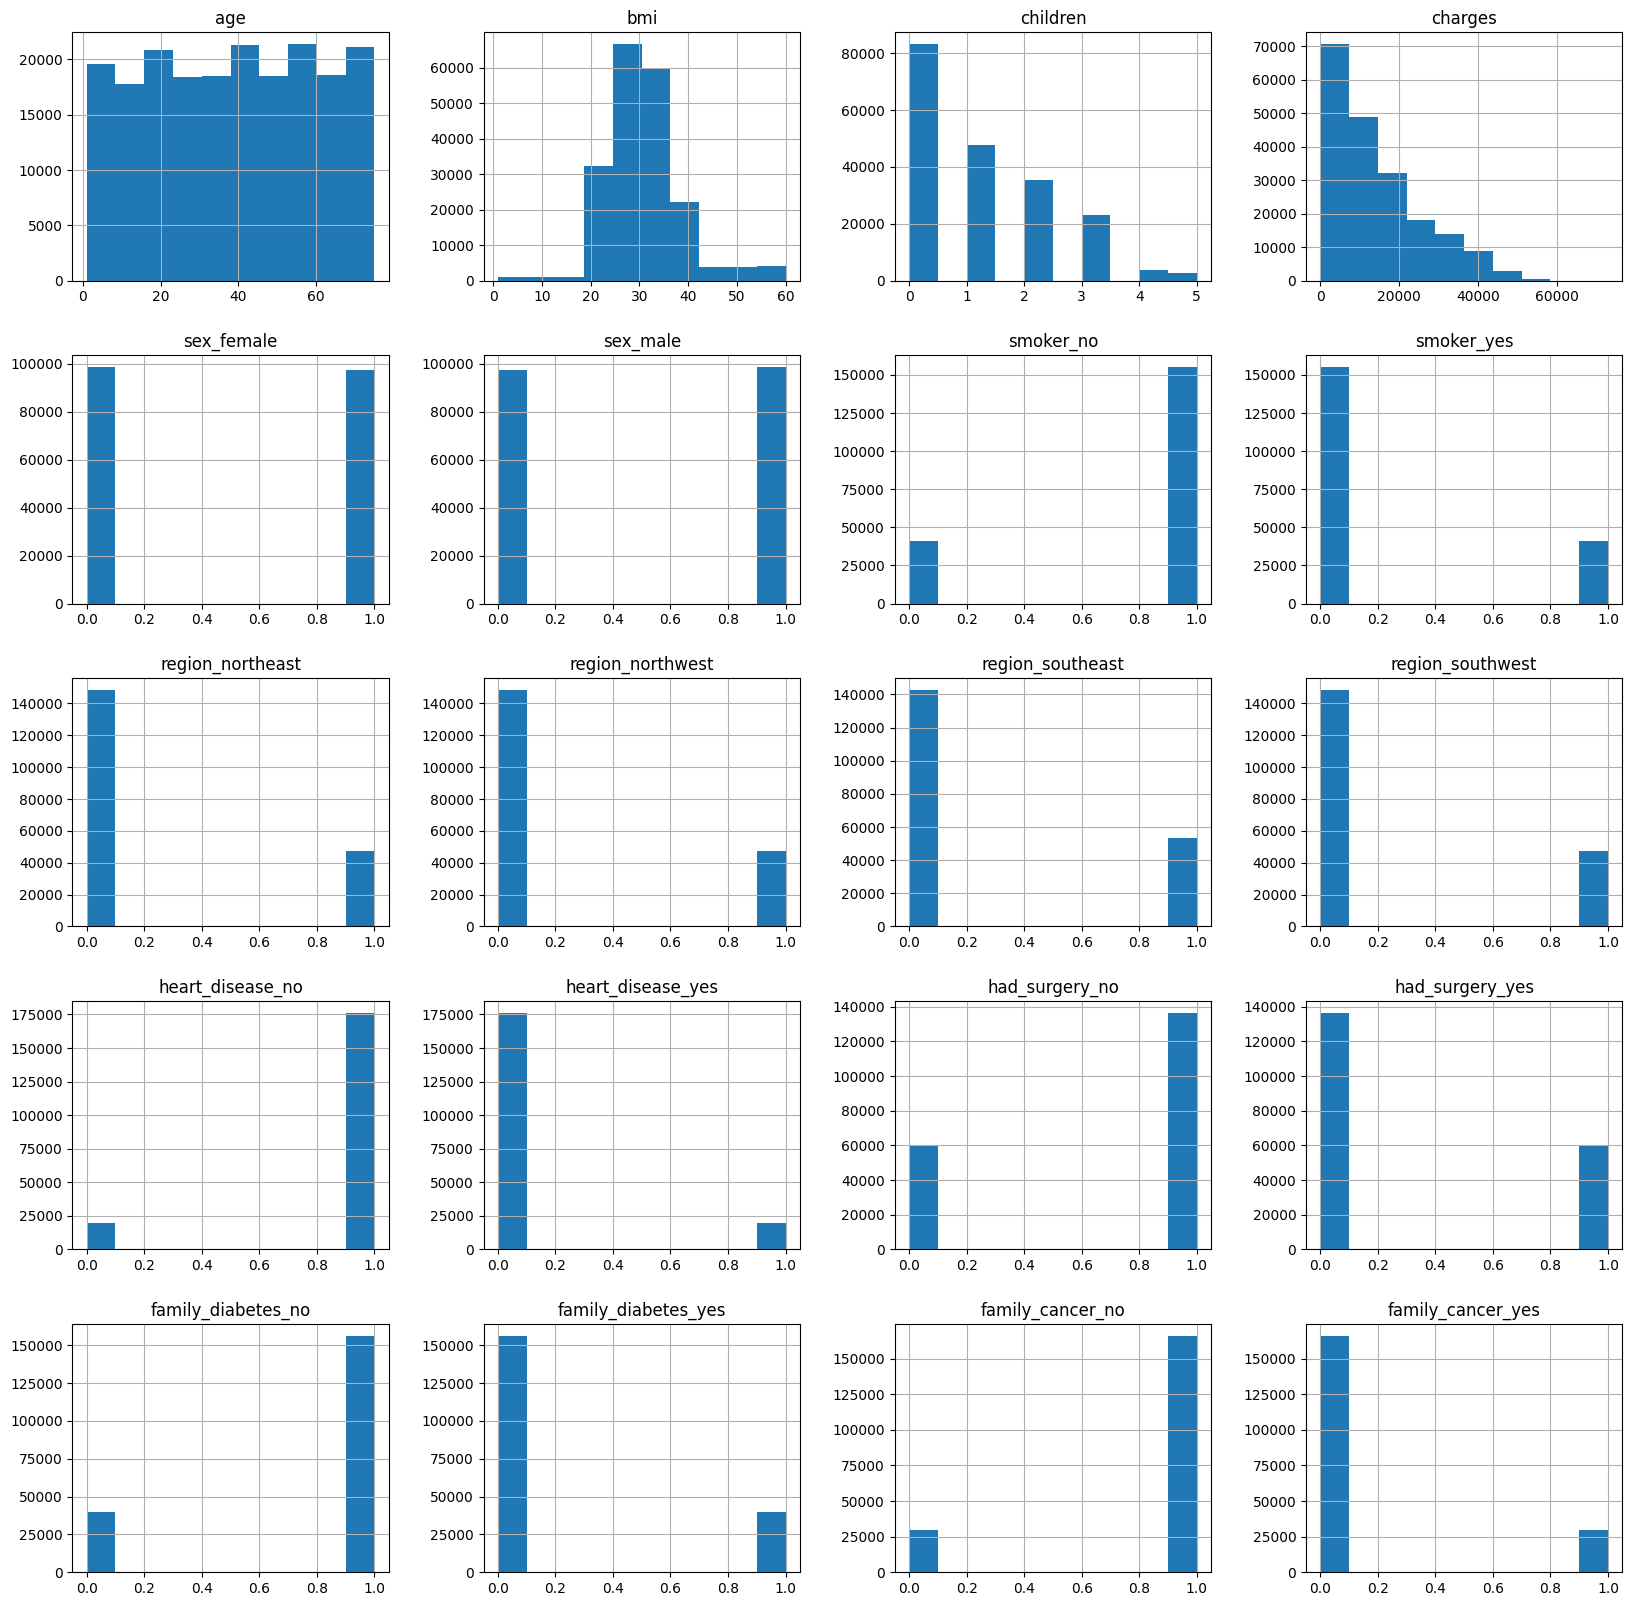

In [ ]:
base_final.hist(figsize=(20,20))
plt.show()

In [ ]:
base_final.isnull().sum()

,0
age,0
bmi,0
children,0
charges,0
sex_female,0
sex_male,0
smoker_no,0
smoker_yes,0
region_northeast,0
region_northwest,0


In [ ]:
matrix_correlacao = base_final.corr()
matrix_correlacao['charges'].sort_values(ascending=False)

,charges
charges,1.000000
smoker_yes,0.769803
age,0.390021
bmi,0.190050
children,0.028186
region_northeast,0.022323
family_diabetes_no,0.013048
region_northwest,0.012201
had_surgery_no,0.007957
family_cancer_no,0.005791


A correlação mais fortes são:
smoker-yes=> 77%
Age => 39%
bmi => 19%

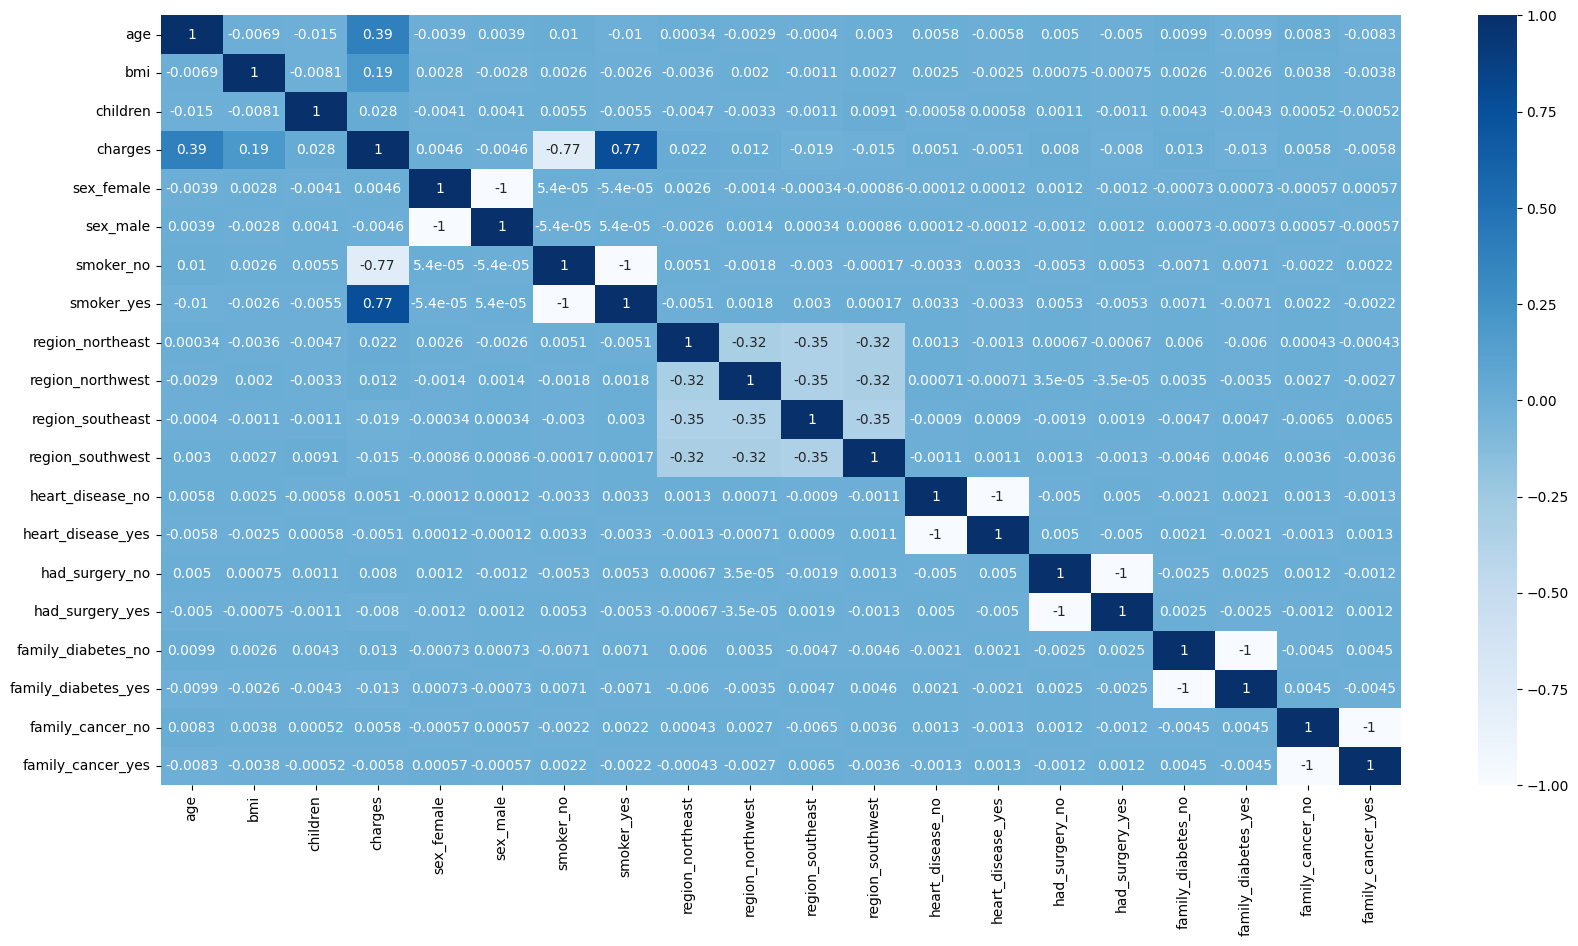

In [ ]:
plt.figure(figsize=(20,10))
sb.heatmap(matrix_correlacao, annot=True, cmap='Blues')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

Vamos treinar nosso modelo com as features mais relevantes.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeRegressor

x = base_final[['age','bmi','smoker_yes']]
y = base_final['charges']

y_cliped = np.clip(y, a_min=0, a_max=limite_superior)

x_train, x_test, y_train, y_test = train_test_split(x, y_cliped, test_size=0.3, random_state=42)

scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LinearRegression()
model.fit(x_train_scaled, y_train)
previsao_LR = model.predict(x_test_scaled)

mse_lr = mean_squared_error(y_test, previsao_LR)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, previsao_LR)
r2 = r2_score(y_test, previsao_LR)

print(f'MSE: {mse_lr}')
print(f'RMSE: {rmse_lr}')
print(f'MAE: {mae_lr}')
print(f'R2: {r2}')

MSE: 29934267.017798994
RMSE: 5471.221711628857
MAE: 4350.993037628986
R2: 0.7895920784427262


In [ ]:
model_dt = DecisionTreeRegressor(max_depth=8, random_state=42)
model_dt.fit(x_train_scaled, y_train)

previsao_dt = model_dt.predict(x_test_scaled)

mse_dt = mean_squared_error(y_test, previsao_dt)
rmse_dt = np.sqrt(mse_dt)
mae_dt = mean_absolute_error(y_test, previsao_dt)
r2_dt = r2_score(y_test, previsao_dt)

print(f'MSE: {mse_dt}')
print(f'RMSE: {rmse_dt}')
print(f'MAE: {mae_dt}')
print(f'R2: {r2_dt}')


MSE: 29859493.084936
RMSE: 5464.384053572369
MAE: 4357.014997205088
R2: 0.7901176643136283


Vamos incluir todas as variáveis para determinar se alguma delas pode trazer alguma melhora para os nossos modelos.

In [ ]:
x_all = base_final.drop(columns='charges')

x_train_all,x_test_all, y_train_all, y_test_all = train_test_split(x_all, y_cliped, test_size=0.3, random_state=42)

scaler_all = RobustScaler()
x_train_all_scaled = scaler_all.fit_transform(x_train_all)
x_test_all_scaled = scaler_all.transform(x_test_all)

model_all = LinearRegression()
model_all.fit(x_train_all_scaled, y_train_all)
previsao_all = model_all.predict(x_test_all_scaled)

mse_all = mean_squared_error(y_test_all, previsao_all)
rmse_all = np.sqrt(mse_all)
mae_all = mean_absolute_error(y_test_all, previsao_all)
r2_all = r2_score(y_test_all, previsao_all)

print(f'MSE: {mse_all}')
print(f'RMSE: {rmse_all}')
print(f'MAE: {mae_all}')
print(f'R2: {r2_all}')

MSE: 29540966.607173424
RMSE: 5435.160219089537
MAE: 4321.579178910578
R2: 0.7923565864862384


In [ ]:
model_dt_all = DecisionTreeRegressor(max_depth=8, random_state=42)
model_dt_all.fit(x_train_all, y_train_all)

previsao_dt_all = model_dt_all.predict(x_test_all)

mse_dt_all = mean_squared_error(y_test_all, previsao_dt_all)
rmse_dt_all = np.sqrt(mse_dt_all)
mae_dt_all = mean_absolute_error(y_test_all, previsao_dt_all)
r2_dt_all = r2_score(y_test_all, previsao_dt_all)

print(f'MSE: {mse_dt_all}')
print(f'RMSE: {rmse_dt_all}')
print(f'MAE: {mae_dt_all}')
print(f'R2: {r2_dt_all}')

MSE: 29928850.637305927
RMSE: 5470.7267010248215
MAE: 4362.4187238142795
R2: 0.789630150173737


Os resultados acima demonstram que as demais features não são relevantes para o nosso modelo não havendo melhora significativa no nosso R²Score.

A seguir vamos utilizar um pipeline em conjunto com Kfold para tentar encontrar um modelo com os hiperparâmetros otimizados e ver se nosso R²Score aumenta.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from  sklearn.model_selection import KFold,RandomizedSearchCV

x_train_final, x_test_final, y_train_final, y_test_final = train_test_split(x, y_cliped, test_size=0.3, random_state=42)


pipeline = Pipeline([
    ('regressor', LinearRegression())
])

kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_parametros = [
    {'regressor': [LinearRegression()],
     'regressor__fit_intercept': [True, False]
     },
    {
      'regressor': [DecisionTreeRegressor(random_state=42)],
     'regressor__max_depth': [None,5,8, 10, 20, 30, 40, 50],
     'regressor__min_samples_split': [2, 5, 10],
     'regressor__max_features': [None, 'sqrt', 'log2']
     },
    {
      'regressor': [RandomForestRegressor(random_state=42)],
     'regressor__n_estimators': [10, 50, 100, 200],
     'regressor__max_depth': [5, 8,10, 20, 30, 40, 50],
     'regressor__min_samples_split': [2, 5, 10],
     'regressor__max_features': [None, 'sqrt', 'log2'],
     'regressor__min_samples_leaf':[1,2]
     }
]


grid = RandomizedSearchCV(estimator=pipeline, n_iter=30, param_distributions=grid_parametros, cv=kf, scoring='r2', n_jobs=-1, verbose=1,refit=True)
grid.fit(x_train_final, y_train_final)

print(f'Melhores parâmetros:{grid.best_params_}')
print(f'Nekgir R² na validação grid:{grid.best_score_}')


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Melhores parâmetros:{'regressor__n_estimators': 100, 'regressor__min_samples_split': 5, 'regressor__min_samples_leaf': 1, 'regressor__max_features': None, 'regressor__max_depth': 8, 'regressor': RandomForestRegressor(random_state=42)}
Nekgir R² na validação grid:0.791763587989488


O melhor modelo foi a arvore randomica, o nosso R²Score não teve um aumento significativo dos nossos resultados com o modelo de regressão Linear.

In [ ]:
print(f'Melhores parâmetros:{grid.best_params_}')
print(f'Nekgir R² na validação grid:{grid.best_score_}')

Melhores parâmetros:{'regressor__n_estimators': 100, 'regressor__min_samples_split': 5, 'regressor__min_samples_leaf': 1, 'regressor__max_features': None, 'regressor__max_depth': 8, 'regressor': RandomForestRegressor(random_state=42)}
Nekgir R² na validação grid:0.791763587989488


In [ ]:
model_final = grid.best_estimator_
previsao_final = model_final.predict(x_test_final)

mse_final = mean_squared_error(y_test_final, previsao_final)
rmse_final = np.sqrt(mse_final)
mae_final = mean_absolute_error(y_test_final, previsao_final)
r2_final = r2_score(y_test_final, previsao_final)

print(f'MSE: {mse_final}')
print(f'RMSE: {rmse_final}')
print(f'MAE: {mae_final}')
print(f'R2: {r2_final}')

MSE: 29577594.893632933
RMSE: 5438.528743477682
MAE: 4340.614926924165
R2: 0.7920991263112634


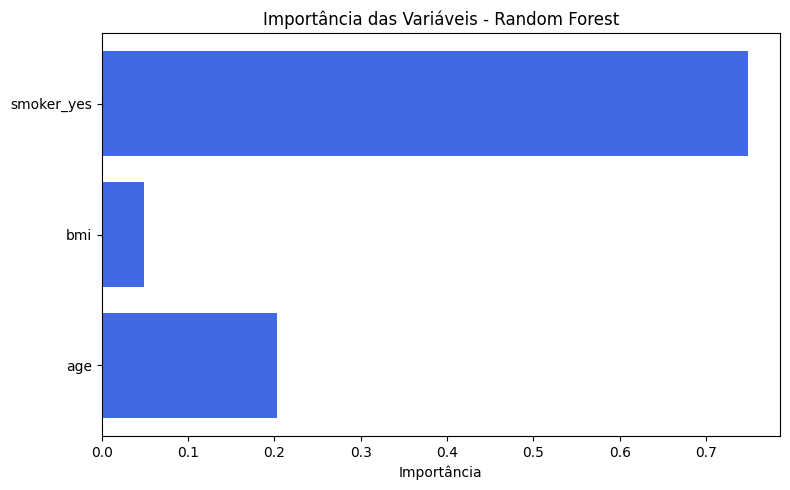

In [ ]:
importancias = model_final.named_steps['regressor'].feature_importances_
variaveis = x.columns

plt.figure(figsize=(8, 5))
plt.barh(variaveis, importancias, color='royalblue')
plt.title('Importância das Variáveis - Random Forest')
plt.xlabel('Importância')
plt.tight_layout()
plt.show()

No gráfico de importância das variáveis podemos ver claramente que smomker_yes é a mais importante.

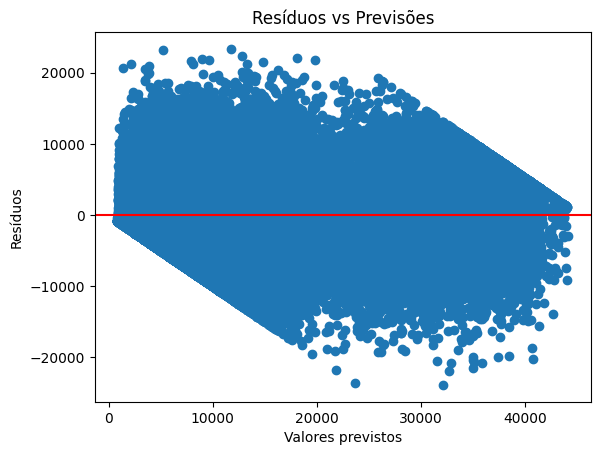

In [ ]:
residuals = y_test_final - previsao_final

plt.scatter(previsao_final, residuals)
plt.axhline(0, color='red')
plt.xlabel("Valores previstos")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Previsões")
plt.show()

“V” invertido na base (triângulo à esquerda)

Você notará que, para previsões muito baixas (próximas de zero), não há resíduos negativos — todo erro é positivo. Isso acontece porque você “clipou” o target para não ficar abaixo de zero; assim, quando o modelo prevê valores baixos, o valor real (sempre ≥0) torna o resíduo = real – previsto ≥0. Esse efeito gera aquele formato de triângulo invertido na zona de previsões baixas.

Heterocedasticidade

A dispersão dos resíduos aumenta conforme crescem os valores previstos. Em termos práticos, o modelo acerta melhor faixas médias, mas erra cada vez mais (tanto para cima quanto para baixo) à medida que as cobranças previstas sobem.
Isso indica variância não constante dos erros e pode prejudicar algumas métricas e intervalos de confiança.

Viés e simetria dos resíduos

No geral, a nuvem de pontos parece centrada em torno da linha vermelha (resíduo = 0), o que é bom — não há viés claro de subestimação ou superestimação global.

Porém, nota-se um ligeiro agrupamento de resíduos negativos logo acima de zero no meio do gráfico, sugerindo que, em algumas faixas, o modelo tende a subestimar levemente.

Outliers

Há pontos isolados com resíduos muito grandes (±20 000+), refletindo casos atípicos onde o modelo erra bastante. Esses outliers podem distorcer métricas como RMSE e R².

R² ≈ 0,79

Um R² de 79 % mostra um bom ajuste geral, mas os padrões de heterocedasticidade e os outliers indicam espaço para melhorias.

ExactExplainer explainer: 58801it [37:35, 25.99it/s]                           


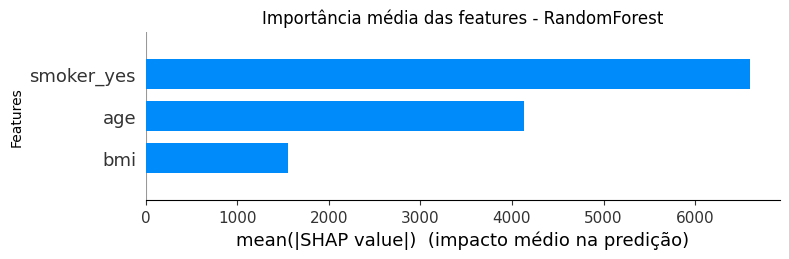

In [ ]:
import shap

x_test_df = pd.DataFrame(x_test_final, columns=x.columns)

explainer = shap.Explainer(model_final.predict, x_test_df)
shap_values = explainer(x_test_df)

shap.summary_plot(shap_values, x_test_df, plot_type="bar",show=False)

plt.title("Importância média das features - RandomForest")
plt.xlabel("mean(|SHAP value|)  (impacto médio na predição)")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

Vamos fazer um pequeno teste para ver se o nosso modelo vai conseguir prever valores próxmos do real.

In [ ]:
fake_data = {
        'age':         ['25'],
        'bmi':         ['30'],
        'smoker_yes':  ['0']
    }

df_fake = pd.DataFrame(fake_data)
previsto=model_final.predict(df_fake)[0]

previsto


np.float64(5246.2816760344895)

In [ ]:
# Filtrar as pessoas de 25 anos que são fumantes
subset = base_final[(base_final['age'] == 25) & (base_final['smoker_yes'] == 0) &(base_final['bmi']==30)]

# Se quiser só a média dos charges desse grupo:
media_25_fumantes = subset['charges'].mean()
print(f"Média de charges para age=25 e smoker=yes: R$ {media_25_fumantes:.2f}")

Média de charges para age=25 e smoker=yes: R$ 4871.09


Podemos concluir que nosso modelo está bem ajustado e prevendo bem em valores médios porém erra mais conforme os valores aumentam. A característica mas importante foi smoker_yes. Esse case faz sentido para o mundo real poderia ser utilizado em uma plataforma que vende seguros para que o cliente possa fazer uma previsão de quanto gastaria em seu plano.